In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mobile_sales_data.csv')

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Get basic statistics
print(df.describe())


Brand               0
Model               0
Base_color          0
Processor           0
Screen_size         0
ROM                 0
RAM                 0
Display_size        0
Num_rear_camera     0
Num_front_camera    0
Battery_capacity    0
Ratings             0
Num_of_ratings      0
Sales_price         0
Discount_percent    0
Sales               0
dtype: int64
Brand                object
Model                object
Base_color           object
Processor            object
Screen_size          object
ROM                   int64
RAM                   int64
Display_size        float64
Num_rear_camera       int64
Num_front_camera      int64
Battery_capacity      int64
Ratings             float64
Num_of_ratings        int64
Sales_price           int64
Discount_percent    float64
Sales               float64
dtype: object
              ROM         RAM  Display_size  Num_rear_camera  \
count  430.000000  430.000000    430.000000       430.000000   
mean   105.748837    5.320930      6.369767  

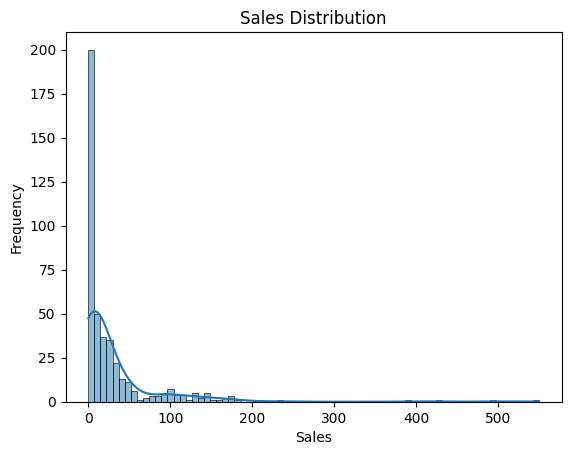

count    430.000000
mean      29.752326
std       58.399588
min        0.000000
25%        1.640000
50%        9.655000
75%       29.717500
max      550.190000
Name: Sales, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of sales
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Calculate summary statistics for sales
print(df['Sales'].describe())


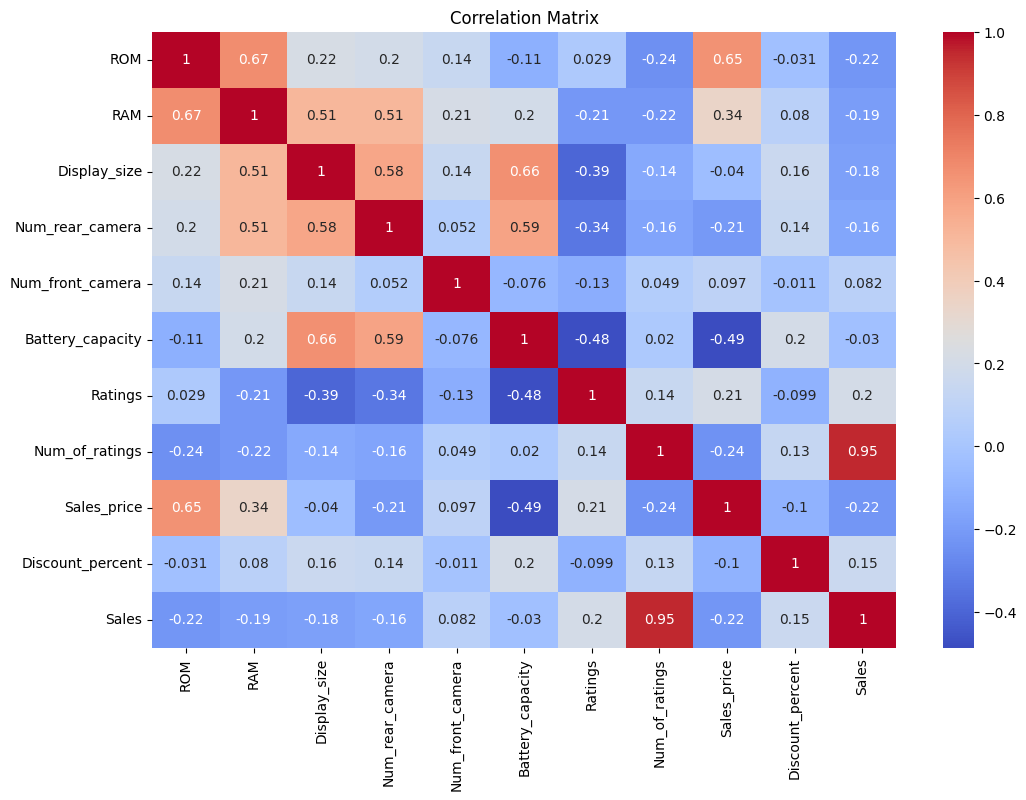

Sales               1.000000
Num_of_ratings      0.950485
Ratings             0.204377
Discount_percent    0.154938
Num_front_camera    0.081543
Battery_capacity   -0.030358
Num_rear_camera    -0.160202
Display_size       -0.182469
RAM                -0.190557
ROM                -0.219048
Sales_price        -0.221278
Name: Sales, dtype: float64


In [12]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Create a correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlations with the 'Sales' column
print(corr_matrix['Sales'].sort_values(ascending=False))



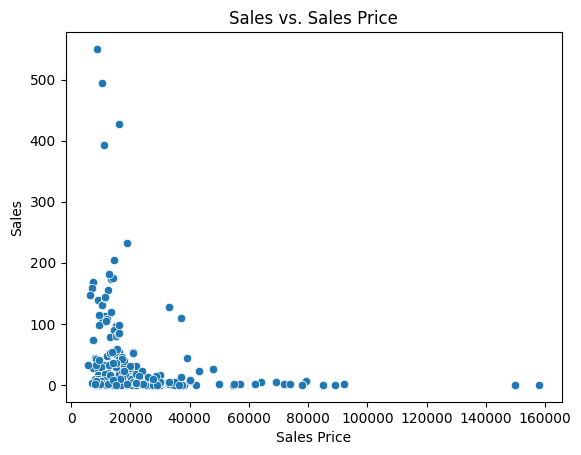

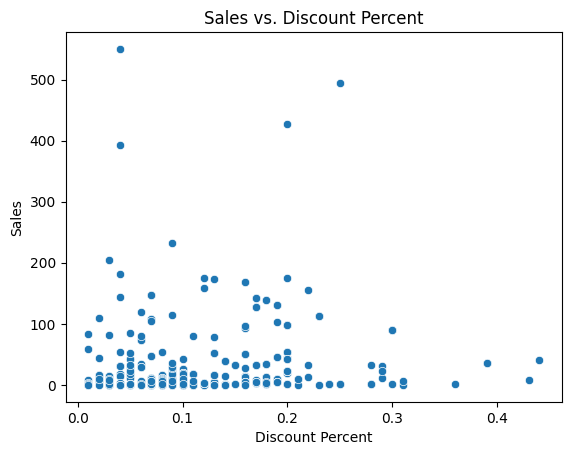

                     Sales  Sales_price  Discount_percent
Sales             1.000000    -0.221278          0.154938
Sales_price      -0.221278     1.000000         -0.100193
Discount_percent  0.154938    -0.100193          1.000000


In [13]:
# Scatter plot of Sales vs. Sales_price
sns.scatterplot(x='Sales_price', y='Sales', data=df)
plt.title('Sales vs. Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Sales')
plt.show()

# Scatter plot of Sales vs. Discount_percent
sns.scatterplot(x='Discount_percent', y='Sales', data=df)
plt.title('Sales vs. Discount Percent')
plt.xlabel('Discount Percent')
plt.ylabel('Sales')
plt.show()

# Calculate correlation coefficients
print(df[['Sales', 'Sales_price', 'Discount_percent']].corr())


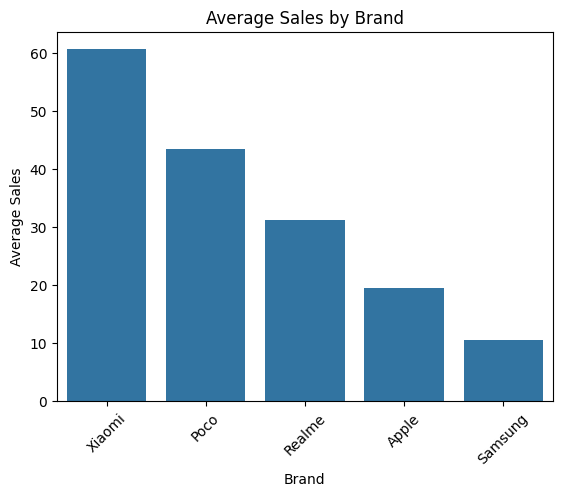

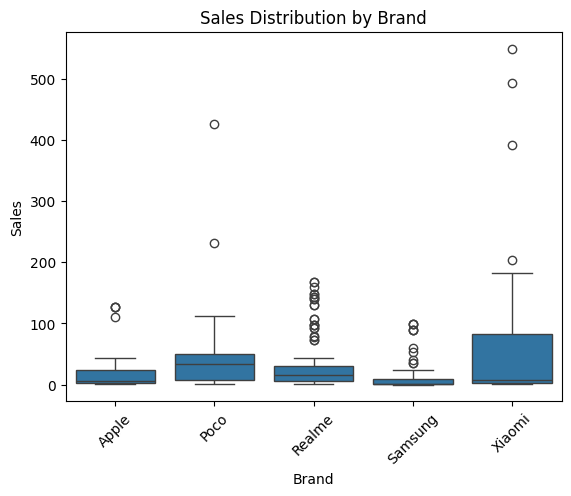

In [14]:
# Bar plot of average sales by brand
brand_sales = df.groupby('Brand')['Sales'].mean().sort_values(ascending=False)
sns.barplot(x=brand_sales.index, y=brand_sales.values)
plt.title('Average Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# Box plot of sales distribution by brand
sns.boxplot(x='Brand', y='Sales', data=df)
plt.title('Sales Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


In [15]:
# Top selling models overall
top_models = df.groupby('Model')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_models)

# Top selling models by brand
top_models_by_brand = df.groupby(['Brand', 'Model'])['Sales'].sum().sort_values(ascending=False).head(10)
print(top_models_by_brand)


Model
Redmi Note 7 Pro    715.50
Galaxy F41          565.53
Redmi Note 4        550.19
Narzo 20            545.98
Redmi Note 6 Pro    542.24
Mi A1               493.98
C2                  480.87
M2                  441.66
iPhone XR           439.47
X2                  427.22
Name: Sales, dtype: float64
Brand    Model           
Xiaomi   Redmi Note 7 Pro    715.50
Samsung  Galaxy F41          565.53
Xiaomi   Redmi Note 4        550.19
Realme   Narzo 20            545.98
Xiaomi   Redmi Note 6 Pro    542.24
         Mi A1               493.98
Realme   C2                  480.87
Poco     M2                  441.66
Apple    iPhone XR           439.47
Poco     X2                  427.22
Name: Sales, dtype: float64


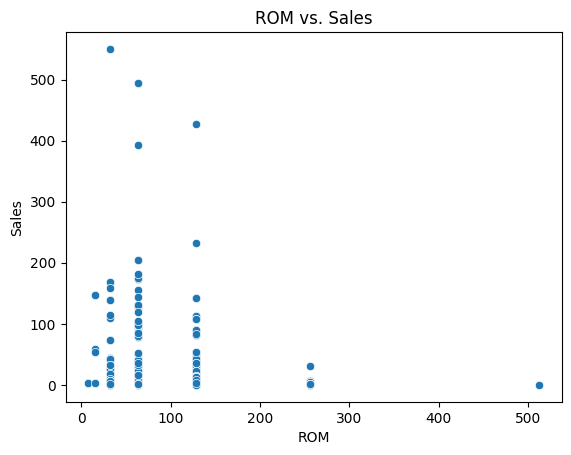

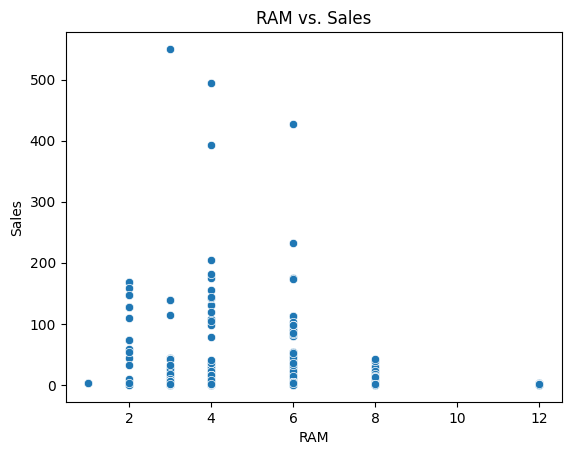

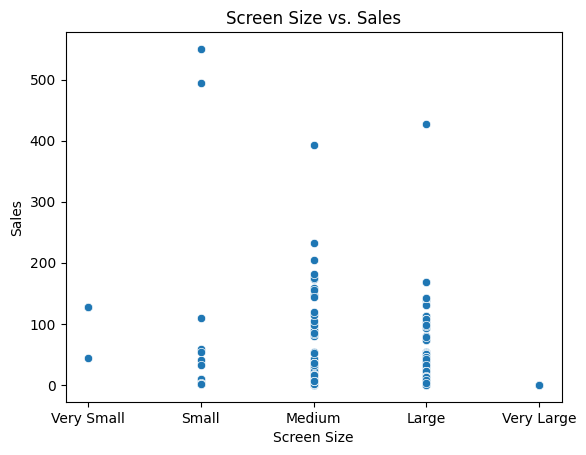

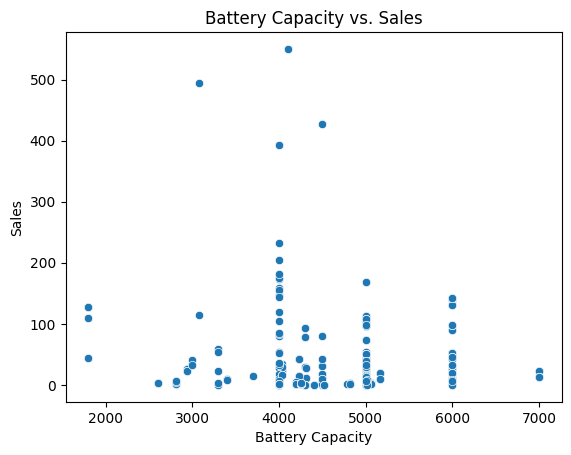

ValueError: could not convert string to float: 'Very Small'

In [16]:
# ROM vs. Sales
sns.scatterplot(x='ROM', y='Sales', data=df)
plt.title('ROM vs. Sales')
plt.xlabel('ROM')
plt.ylabel('Sales')
plt.show()

# RAM vs. Sales
sns.scatterplot(x='RAM', y='Sales', data=df)
plt.title('RAM vs. Sales')
plt.xlabel('RAM')
plt.ylabel('Sales')
plt.show()

# Screen_size vs. Sales
sns.scatterplot(x='Screen_size', y='Sales', data=df)
plt.title('Screen Size vs. Sales')
plt.xlabel('Screen Size')
plt.ylabel('Sales')
plt.show()

# Battery_capacity vs. Sales
sns.scatterplot(x='Battery_capacity', y='Sales', data=df)
plt.title('Battery Capacity vs. Sales')
plt.xlabel('Battery Capacity')
plt.ylabel('Sales')
plt.show()

# Calculate correlation coefficients for these variables
print(df[['Sales', 'ROM', 'RAM', 'Screen_size', 'Battery_capacity']].corr())


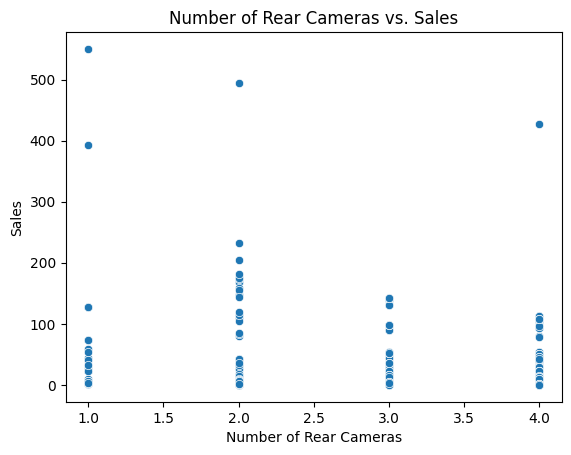

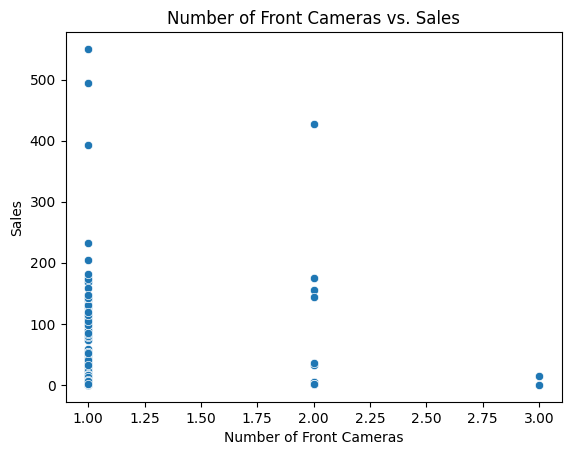

                     Sales  Num_rear_camera  Num_front_camera
Sales             1.000000        -0.160202          0.081543
Num_rear_camera  -0.160202         1.000000          0.051818
Num_front_camera  0.081543         0.051818          1.000000


In [17]:
# Num_rear_camera vs. Sales
sns.scatterplot(x='Num_rear_camera', y='Sales', data=df)
plt.title('Number of Rear Cameras vs. Sales')
plt.xlabel('Number of Rear Cameras')
plt.ylabel('Sales')
plt.show()

# Num_front_camera vs. Sales
sns.scatterplot(x='Num_front_camera', y='Sales', data=df)
plt.title('Number of Front Cameras vs. Sales')
plt.xlabel('Number of Front Cameras')
plt.ylabel('Sales')
plt.show()

# Calculate correlation coefficients
print(df[['Sales', 'Num_rear_camera', 'Num_front_camera']].corr())


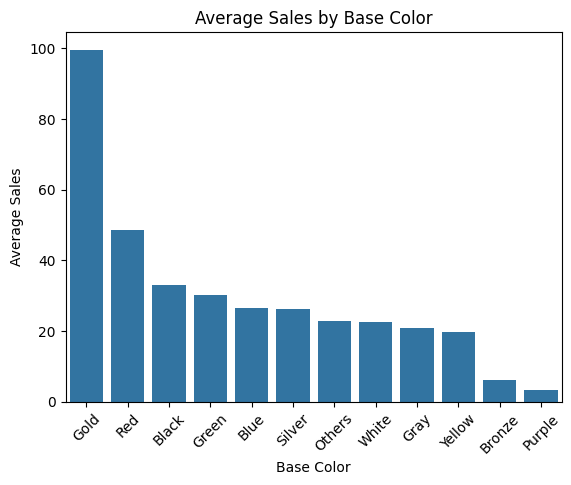

In [18]:
# Bar plot of average sales by Base_color
color_sales = df.groupby('Base_color')['Sales'].mean().sort_values(ascending=False)
sns.barplot(x=color_sales.index, y=color_sales.values)
plt.title('Average Sales by Base Color')
plt.xlabel('Base Color')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


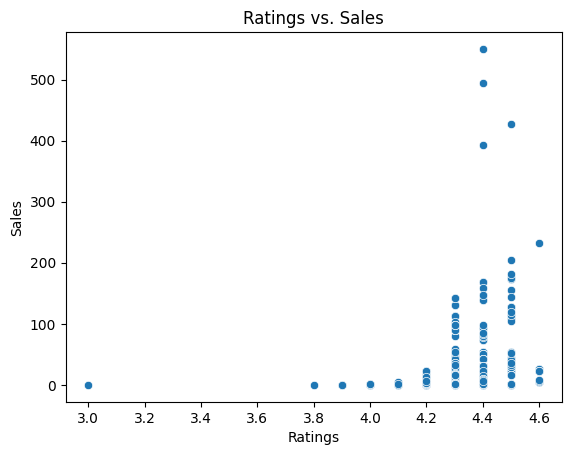

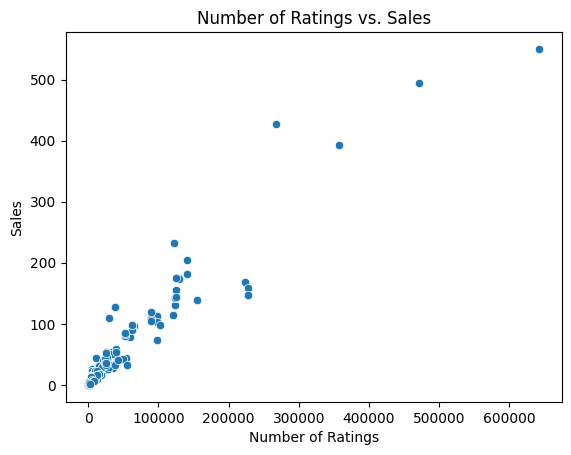

                   Sales   Ratings  Num_of_ratings
Sales           1.000000  0.204377        0.950485
Ratings         0.204377  1.000000        0.142089
Num_of_ratings  0.950485  0.142089        1.000000


In [19]:
# Ratings vs. Sales
sns.scatterplot(x='Ratings', y='Sales', data=df)
plt.title('Ratings vs. Sales')
plt.xlabel('Ratings')
plt.ylabel('Sales')
plt.show()

# Number of Ratings vs. Sales
sns.scatterplot(x='Num_of_ratings', y='Sales', data=df)
plt.title('Number of Ratings vs. Sales')
plt.xlabel('Number of Ratings')
plt.ylabel('Sales')
plt.show()

# Calculate correlation coefficients
print(df[['Sales', 'Ratings', 'Num_of_ratings']].corr())


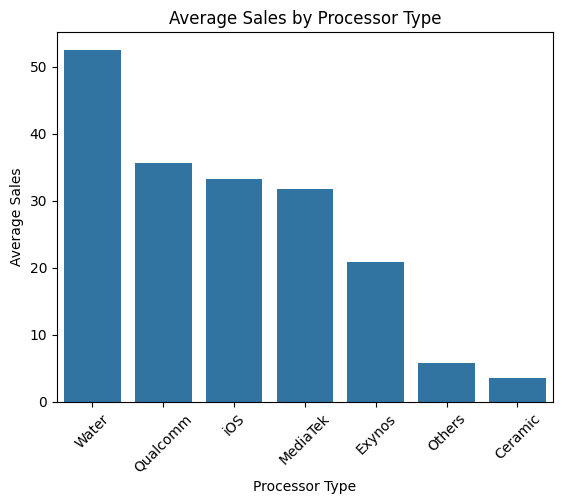

In [20]:
# Bar plot of average sales by processor type
processor_sales = df.groupby('Processor')['Sales'].mean().sort_values(ascending=False)
sns.barplot(x=processor_sales.index, y=processor_sales.values)
plt.title('Average Sales by Processor Type')
plt.xlabel('Processor Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


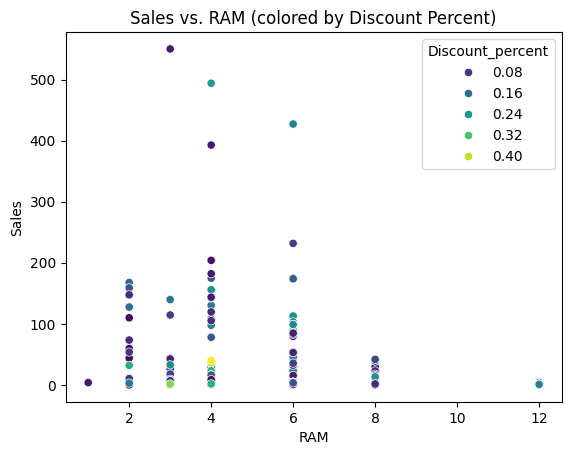

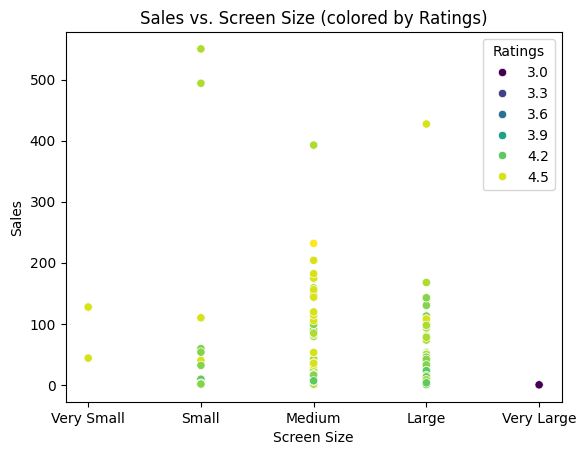

In [21]:
# Scatter plot with Sales on y-axis and RAM on x-axis, color by Discount_percent
sns.scatterplot(x='RAM', y='Sales', hue='Discount_percent', data=df, palette='viridis')
plt.title('Sales vs. RAM (colored by Discount Percent)')
plt.xlabel('RAM')
plt.ylabel('Sales')
plt.show()

# Scatter plot with Sales on y-axis and Screen_size on x-axis, color by Ratings
sns.scatterplot(x='Screen_size', y='Sales', hue='Ratings', data=df, palette='viridis')
plt.title('Sales vs. Screen Size (colored by Ratings)')
plt.xlabel('Screen Size')
plt.ylabel('Sales')
plt.show()


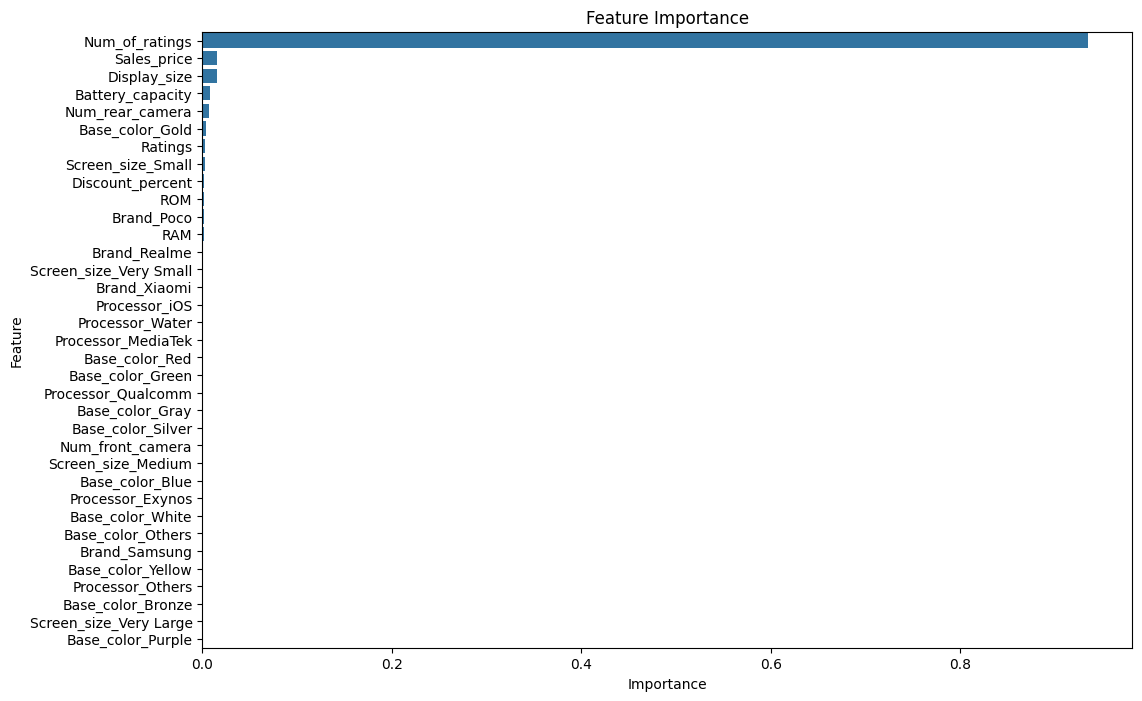

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Prepare the data
X = df.drop(columns=['Sales', 'Model'])
y = df['Sales']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()
